In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_infos = []
for i in range(9): # 9 clusters
    path = '../Data/Cluster'+str(i)
    df = pd.read_csv(path, delimiter=',')
    df.rename(columns={"Unnamed: 0": "original_id"},inplace=True)
    df_info = df.mean().append(pd.Series({"count":len(df)}))
    df_infos.append(df_info[2:]) # id averages are meaningless
#     print(i, df.mean(), len(df), sep="\n")
cluster_summaries = pd.concat(df_infos, axis=1).T
cluster_summaries

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
0,20669.682405,1.103330,160.565155,76.843981,133.340557,83.976464,2.494546,1.179966,0.000574,0.000000,0.936137,0.713261,6968.0
1,16804.790804,1.021560,161.676769,67.960855,120.330591,78.030912,1.088146,1.053251,0.000000,0.000000,0.999567,0.303922,11549.0
2,19097.375367,1.856758,169.229187,76.969956,127.459843,81.954212,1.328844,1.154995,1.000000,0.000000,0.831783,0.472576,4084.0
3,20343.658140,1.291097,163.757684,77.412056,130.465992,83.475114,2.412453,2.967678,0.030537,0.007139,0.794368,0.630180,5043.0
4,19856.270474,1.394397,164.149784,80.874784,283.534483,1205.133621,1.545259,1.271552,0.084052,0.039871,0.831897,0.846983,928.0
5,19141.376863,1.699810,167.741804,78.135546,129.364129,89.604443,1.451368,1.235979,0.500948,1.000000,0.845299,0.476836,3691.0
6,19349.775968,1.991693,170.617485,77.147463,127.574225,81.887326,1.144338,1.067440,0.000000,0.000000,0.996628,0.475121,12159.0
7,19400.027430,1.312297,164.301548,73.431637,125.519970,81.079418,1.171532,1.079789,0.000000,0.000000,0.000000,0.509221,10791.0
8,20993.569960,1.010617,161.167174,72.729311,126.708934,81.317779,1.000338,1.042132,0.000000,0.000000,0.999594,0.512139,14787.0


In [17]:
cluster_summaries["baseline"] = pd.concat([cluster_summaries["cardio"], 1-cluster_summaries["cardio"]],axis=1).max(axis=1)
cluster_summaries#.sort_values(by=['baseline'], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count,baseline
0,56.629267,1.103330,160.565155,76.843981,133.340557,83.976464,2.494546,1.179966,0.000574,0.000000,0.936137,0.713261,6968.0,0.713261
1,46.040523,1.021560,161.676769,67.960855,120.330591,78.030912,1.088146,1.053251,0.000000,0.000000,0.999567,0.303922,11549.0,0.696078
2,52.321576,1.856758,169.229187,76.969956,127.459843,81.954212,1.328844,1.154995,1.000000,0.000000,0.831783,0.472576,4084.0,0.527424
3,55.736050,1.291097,163.757684,77.412056,130.465992,83.475114,2.412453,2.967678,0.030537,0.007139,0.794368,0.630180,5043.0,0.630180
4,54.400741,1.394397,164.149784,80.874784,283.534483,1205.133621,1.545259,1.271552,0.084052,0.039871,0.831897,0.846983,928.0,0.846983
5,52.442128,1.699810,167.741804,78.135546,129.364129,89.604443,1.451368,1.235979,0.500948,1.000000,0.845299,0.476836,3691.0,0.523164
6,53.013085,1.991693,170.617485,77.147463,127.574225,81.887326,1.144338,1.067440,0.000000,0.000000,0.996628,0.475121,12159.0,0.524879
7,53.150760,1.312297,164.301548,73.431637,125.519970,81.079418,1.171532,1.079789,0.000000,0.000000,0.000000,0.509221,10791.0,0.509221
8,57.516630,1.010617,161.167174,72.729311,126.708934,81.317779,1.000338,1.042132,0.000000,0.000000,0.999594,0.512139,14787.0,0.512139


In [3]:
n,m = cluster_summaries.shape
cluster_summaries["age"] = cluster_summaries["age"].div(365)
cluster_summaries.sort_values(by=['count'], ascending=False) #8,6,(1),7

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
8,57.516630,1.010617,161.167174,72.729311,126.708934,81.317779,1.000338,1.042132,0.000000,0.000000,0.999594,0.512139,14787.0
6,53.013085,1.991693,170.617485,77.147463,127.574225,81.887326,1.144338,1.067440,0.000000,0.000000,0.996628,0.475121,12159.0
1,46.040523,1.021560,161.676769,67.960855,120.330591,78.030912,1.088146,1.053251,0.000000,0.000000,0.999567,0.303922,11549.0
7,53.150760,1.312297,164.301548,73.431637,125.519970,81.079418,1.171532,1.079789,0.000000,0.000000,0.000000,0.509221,10791.0
0,56.629267,1.103330,160.565155,76.843981,133.340557,83.976464,2.494546,1.179966,0.000574,0.000000,0.936137,0.713261,6968.0
3,55.736050,1.291097,163.757684,77.412056,130.465992,83.475114,2.412453,2.967678,0.030537,0.007139,0.794368,0.630180,5043.0
2,52.321576,1.856758,169.229187,76.969956,127.459843,81.954212,1.328844,1.154995,1.000000,0.000000,0.831783,0.472576,4084.0
5,52.442128,1.699810,167.741804,78.135546,129.364129,89.604443,1.451368,1.235979,0.500948,1.000000,0.845299,0.476836,3691.0
4,54.400741,1.394397,164.149784,80.874784,283.534483,1205.133621,1.545259,1.271552,0.084052,0.039871,0.831897,0.846983,928.0


In [4]:
cluster_summaries.sort_values(by=['cardio'], ascending=False)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,count
4,54.400741,1.394397,164.149784,80.874784,283.534483,1205.133621,1.545259,1.271552,0.084052,0.039871,0.831897,0.846983,928.0
0,56.629267,1.103330,160.565155,76.843981,133.340557,83.976464,2.494546,1.179966,0.000574,0.000000,0.936137,0.713261,6968.0
3,55.736050,1.291097,163.757684,77.412056,130.465992,83.475114,2.412453,2.967678,0.030537,0.007139,0.794368,0.630180,5043.0
8,57.516630,1.010617,161.167174,72.729311,126.708934,81.317779,1.000338,1.042132,0.000000,0.000000,0.999594,0.512139,14787.0
7,53.150760,1.312297,164.301548,73.431637,125.519970,81.079418,1.171532,1.079789,0.000000,0.000000,0.000000,0.509221,10791.0
5,52.442128,1.699810,167.741804,78.135546,129.364129,89.604443,1.451368,1.235979,0.500948,1.000000,0.845299,0.476836,3691.0
6,53.013085,1.991693,170.617485,77.147463,127.574225,81.887326,1.144338,1.067440,0.000000,0.000000,0.996628,0.475121,12159.0
2,52.321576,1.856758,169.229187,76.969956,127.459843,81.954212,1.328844,1.154995,1.000000,0.000000,0.831783,0.472576,4084.0
1,46.040523,1.021560,161.676769,67.960855,120.330591,78.030912,1.088146,1.053251,0.000000,0.000000,0.999567,0.303922,11549.0


In [5]:
# check overall target %
sum(cluster_summaries["cardio"]*cluster_summaries["count"])/sum(cluster_summaries["count"])

0.4997

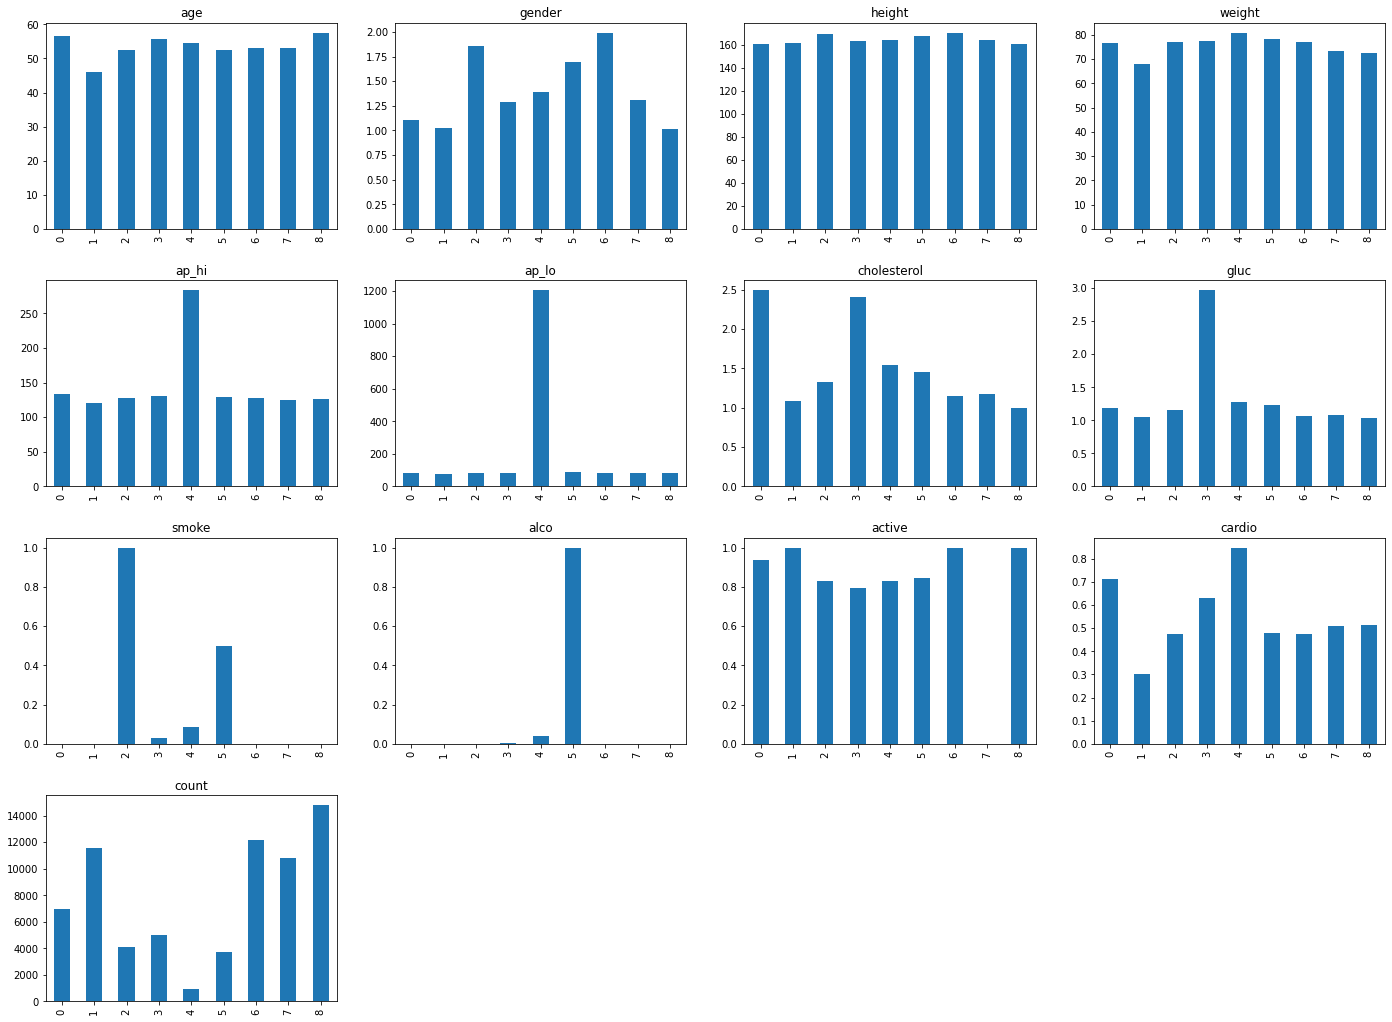

In [6]:
import math
p = math.ceil(math.sqrt(m))
fig, axes = plt.subplots(nrows=p, ncols=p,figsize=(24,18))

plt.subplots_adjust(wspace=0.2, hspace=0.25)

(i,j) = 0,0
for col in cluster_summaries.columns:
    cluster_summaries[col].plot.bar(ax=axes[j//p, j%p])
    axes[j//p, j%p].set_title(col)
    j += 1
    
for r in range(j,p**2): # remove extra axis
    axes[r//p, r%p].set_axis_off()

### Key Observations:
- Cluster 0: high cholesterol
- Cluster 1: lowest cvd%, youngest
- Cluster 2: pure smokers (no alcohol)
- Cluster 3: high glucose, high cholesterol
- Cluster 4: fewest members, highest cvd%, high blood pressure
- Cluster 5: alcoholics, some smokers
- Cluster 6: more male
- Cluster 7: not active at all
- Cluster 8: more female

In [ ]:
# ideally, scatter with cluster index labels